<a href="https://colab.research.google.com/github/20250166/NLP_2025/blob/main/Ohmygod_Finally" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'red'> 🐹 👀 🐾 **Text/Content/Web Scraping without HTML tags**

## **API-based Data Collection**

### <font color = 'blue'> **cf., Crawling (a.k.a. HTML Scraping) or Text Mining**

In [ ]:
pip install requests

##🐣 **Defining a function for text scraping**

In [ ]:
import requests #Import the requests library to make HTTP requests.

def get_wikipedia_page(title):                   #Define a function
    URL = "https://en.wikipedia.org/w/api.php"  #Set the API(application program interface) endpoint URL: https://en.wikipedia.org/w/api.php.

    PARAMS = {                                  #Build PARAMS (query parameters) for the API request:
        "action": "query",                      #ask the API to run a query
        "format": "json",                       #request a JSON response
        "prop": "extracts",                     #ask for the page extract (clean text summary)
        "titles": title,                        #specify which page to fetch (by title)
        "explaintext": 1                        #return plain text (no HTML/markup)

    }

    headers = {
        "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 " #header to mimic a normal browser request (helps avoid blocks)
                      "(KHTML, like Gecko) Chrome/123.0 Safari/537.36"
    }

    response = requests.get(URL, params=PARAMS, headers=headers)           #Send a GET request to the API with requests

    if response.status_code != 200:                                        #Check the HTTP status code: If not 200 OK, print an error message and return None.
        print("HTTP error:", response.status_code)
        return None

    try:
        data = response.json()                                            #Try to parse the response body as JSON with response.json():
    except:
        print("JSON decode error")                                        #If JSON decoding fails, print a debug message showing the start of the raw response and return None.
        print("Raw response:", response.text[:500])
        return None

    pages = data.get("query", {}).get("pages", {})                      #Navigate the JSON structure to the page data: data["query"]["pages"] (a dictionary keyed by numeric page id).
    page = next(iter(pages.values()))                                   #Extract the single page object with next(iter(pages.values())) (handles the unknown page id).
    return page.get("extract", "")                                      #Return the page’s plain-text extract via page.get("extract", "").
                                                                        #If the page exists, this is the article text; if not, it returns an empty string (or None earlier if errors occurred).

##🐹🐾 **Install NLTK and Download necessary models**

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

###🐹🐾 **1️⃣ Pandas Library**

In [ ]:
!pip install pandas
!pip install lexical_diversity
import pandas as pd #Import Pandas Package
import lexical_diversity as ld

# 🅰️ **Group1**

## ✅ **Text scraping for Group1**

In [ ]:
titles = [
    "K-pop",
    "Korean Wave",
    "KPop Demon Hunters",
    "BTS"
]

corpus = {}

for t in titles:
    txt = get_wikipedia_page(t)
    if txt:
        corpus[t] = txt
    else:
        print("Failed:", t)

# Show first 200 chars for each
for title, text in corpus.items():
    print("\n====", title, "====")
    print(text[:200])


==== K-pop ====
K-pop (Korean: 케이팝; RR: Keipap; an abbreviation of "Korean popular music") is a form of popular music originating in South Korea. The music genre that the term is used to refer to colloquially emerged

==== Korean Wave ====
The Korean Wave, or hallyu (Korean: 한류; ), refers to the rapid global rise in South Korean popular culture since the 1990s. It is led by the spread of K-pop, K-dramas, and films, with key successes in

==== KPop Demon Hunters ====
KPop Demon Hunters is a 2025 American animated musical urban fantasy film directed by Maggie Kang and Chris Appelhans from a screenplay they co-wrote with Danya Jimenez and Hannah McMechan. Produced b

==== BTS ====
BTS (Korean: 방탄소년단; RR: Bangtan Sonyeondan; lit. Bulletproof Boy Scouts), also known as the Bangtan Boys, is a South Korean boy band formed in 2010. The band consists of Jin, Suga, J-Hope, RM, Jimin, 


##🐹 🐾 📌 **Use this!!!**📌
###⭕ <font color = 'green'> **Script for [Group1] — Create one Txt file with records separated by @@@@@**

In [ ]:
output = []

for title in titles:
    txt = get_wikipedia_page(title)
    if not txt:
        txt = ""   # store empty if missing
    block = f"@@@@@\nTITLE: {title}\n{txt}\n"
    output.append(block)

final = "\n".join(output)

with open("wiki_corpus_delimited_group1.txt", "w", encoding="utf-8") as f:
    f.write(final)

print("Saved: wiki_corpus_delimited_group1.txt")

Saved: wiki_corpus_delimited_group1.txt


####✅ **Alternative Script for [Group1] — Create one CSV with two columns (title + text)**

In [ ]:
import csv

rows = []

for title in titles:
    txt = get_wikipedia_page(title)
    rows.append([title, txt])

with open("wiki_corpus_delimited_group1.csv", "w", encoding="utf-8", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["title", "text"])
    writer.writerows(rows)

print("Saved: wiki_corpus_delimited_group1.csv")

Saved: wiki_corpus_delimited_group1.csv


# 🐹🐾 **Read the txt file**
###🐣 **Open and read the text file for Group1**

In [ ]:
# ▶️ Step 1: You need to modify this codeline 🍎🍎🍎🍎🍎
file = open("/content/wiki_corpus_delimited_group1.txt", 'rt')

txt = file.read()
print(txt)
file.close() #Using this close()function, you are no longer using your text file of the current workingdirectory with open()function.

##🐹🐾 ❄️ **Basic Cleaning**
###**📍Apply a series of functions for replacement in Group1**

In [ ]:
import re

# Step 1: Read file to change path as needed 🍎🍎🍎🍎🍎🍎
with open("/content/wiki_corpus_delimited_group1.txt", 'rt') as fl:
    raw_text = fl.read()

# STEP 2: Clean the text
clean_text = (
    raw_text
    .replace("\n", " ")
    .replace("“", "")
    .replace("”", "")
    .replace("\"", "")
    .replace("/", "")
    .replace("_", "")
    .replace("===", "")
    .replace("==", "")
    .replace("=", "")
    .replace("*", "")
    .replace("?", "")
    .replace("!", "")
    .replace("--", " ")
    .replace("(", "")
    .replace(")", "")
)

# STEP 3: Save the cleaned content to a NEW file as you designate the output path 🍏🍏🍏🍏🍏🍏
output_path = "/content/wiki_corpus_delimited_group1_CLEANED.txt"
with open(output_path, 'w') as cf:
    cf.write(clean_text) #Get content named 'clean_text' to the new empty file

# Optional: Print to verify
print("✅ Cleaned text saved to:", output_path)

✅ Cleaned text saved to: /content/wiki_corpus_delimited_group1_CLEANED.txt


###🐹🐣🐣🐣**Download and edit two txt files so that it has headers delimited by @, and upload it under [Wikipedia] Foldr of your github account!**

##✅ ✅**Text scraping for Group2**

In [ ]:
titles = [
    "2024 Nobel Prize in Literature",
    "Han Kang",
    "Bong Joon Ho",
    "Pachinko"
]

corpus = {}

for t in titles:
    txt = get_wikipedia_page(t)
    if txt:
        corpus[t] = txt
    else:
        print("Failed:", t)

# Show first 200 chars for each
for title, text in corpus.items():
    print("\n====", title, "====")
    print(text[:200])


==== 2024 Nobel Prize in Literature ====
The 2024 Nobel Prize in Literature was awarded to the South Korean author Han Kang (born 1970) "for her intense poetic prose that confronts historical traumas and exposes the fragility of human life".

==== Han Kang ====
Han Kang (Korean: 한강; born 27 November 1970) is a South Korean writer. From 2007 to 2018, she taught creative writing at the Seoul Institute of the Arts. Han rose to international prominence for her n

==== Bong Joon Ho ====
Bong Joon Ho (Korean: 봉준호; pronounced [poːŋ tɕuːnho]; born September 14, 1969) is a South Korean filmmaker. His work is characterized by emphasis on social and class themes, genre-mixing, dark comedy,

==== Pachinko ====
Pachinko (Japanese: パチンコ; pronounced [patɕiŋko]) is a mechanical game originating in Japan that is used as an arcade game and, much more frequently, for gambling. Pachinko fills a niche in Japanese ga


##⭕⭕ <font color = 'blue'> **Script for [Group2] — Create one Txt file with records separated by @@@@@**

In [ ]:
output = []

for title in titles:
    txt = get_wikipedia_page(title)
    if not txt:
        txt = ""   # store empty if missing
    block = f"@@@@@\nTITLE: {title}\n{txt}\n"
    output.append(block)

final = "\n".join(output)

with open("wiki_corpus_delimited_group2.txt", "w", encoding="utf-8") as f:
    f.write(final)

print("Saved: wiki_corpus_delimited_group2.txt")

Saved: wiki_corpus_delimited_group2.txt


###🐣🐣 **Open and read the text file for Group2**

In [ ]:
# ▶️ Step 1: You need to modify this codeline 🍎🍎🍎🍎🍎
file = open("/content/wiki_corpus_delimited_group2.txt", 'rt')

txt = file.read()
print(txt)
file.close() #Using this close()function, you are no longer using your text file of the current workingdirectory with open()function.

##**📍📍Apply a series of functions for replacement in Group2**

In [ ]:
import re

# Step 1: Read file to change path as needed 🍎🍎🍎🍎🍎🍎
with open("/content/wiki_corpus_delimited_group2.txt", 'rt') as fl:
    raw_text = fl.read()

# STEP 2: Clean the text
clean_text = (
    raw_text
    .replace("\n", " ")
    .replace("“", "")
    .replace("”", "")
    .replace("\"", "")
    .replace("/", "")
    .replace("_", "")
    .replace("===", "")
    .replace("==", "")
    .replace("=", "")
    .replace("*", "")
    .replace("?", "")
    .replace("!", "")
    .replace("--", " ")
    .replace("(", "")
    .replace(")", "")
)

# STEP 3: Save the cleaned content to a NEW file as you designate the output path 🍏🍏🍏🍏🍏🍏
output_path = "/content/wiki_corpus_delimited_group2_CLEANED.txt"
with open(output_path, 'w') as cf:
    cf.write(clean_text) #Get content named 'clean_text' to the new empty file

# Optional: Print to verify
print("✅ Cleaned text saved to:", output_path)

✅ Cleaned text saved to: /content/wiki_corpus_delimited_group2_CLEANED.txt


###🐹🐣🐣🐣**Download and edit two txt files so that it has headers delimited by @, and upload it under [Wikipedia] Foldr of your github account!**

###🐹🐣**Clone your github repository of your interest**

In [ ]:
!git clone https://github.com/20250166/NLP_2025

Cloning into 'NLP_2025'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 34 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 97.05 KiB | 5.71 MiB/s, done.
Resolving deltas: 100% (13/13), done.


###🍄🍄 **If you need to remove the repository you've just cloned, run the following code cell if necessary.**

- <font color = 'red'> **_import shutil_**

- <font color = 'red'> **_shutil.rmtree('/CurrentDirectoryPath')_**

In [ ]:
#@markdown <font color = 'purple'> Run this cell if needed...
import shutil
shutil.rmtree('/content/NLP_2025')

In [ ]:
#Reset your current directory after you remove your directory manually (e.g., shutil.rmtree())
import os
os.chdir('/')
os.chdir('/content')

!git clone https://github.com/20250166/NLP_2025

Cloning into 'NLP_2025'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 34 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 97.05 KiB | 6.06 MiB/s, done.
Resolving deltas: 100% (13/13), done.


#💊 3️⃣ <font color = 'green'> **Avoid overlapping indecies**

In [ ]:
import pandas as pd
import glob

# Change directory 🍎🍎🍎🍎🍎
%cd /content/NLP_2025/Wikipedia1

# Load all .txt files
fns = glob.glob('*.txt')

# List to hold each temporary DataFrame
df_list = []

# Load each file and append to list
for fn in fns:
    dftmp = pd.read_csv(fn, sep='@')
    df_list.append(dftmp)

# Concatenate all and reset index
df = pd.concat(df_list, ignore_index=True)

# Go back to main directory
%cd /content

# Save as CSV
df.to_csv("./wiki_group1_group2.csv", index=False)

# Display the DataFrame
print(df)

/content/NLP_2025/Wikipedia1
/content
                                                Text  \
0  JacquesLouis David French ʒaklwi david 30 Augu...   
1  JeanAugusteDominique Ingres JeanAugusteDominiq...   
2  Anton Raphael Mengs 12 March 1728  29 June 177...   
3  PierreNarcisse, baron Guérin 13 March 1774  6 ...   
4  TITLE Francisco Goya Francisco José de Goya y ...   
5  Eugène Delacroix Ferdinand Victor Eugène Delac...   
6   "Caspar David Friedrich Caspar David Friedric...   
7  J. M. W. Turner Joseph Mallord William Turner ...   

                         Title          Group   
0           JacquesLouis David       Group2     
1  JeanAugusteDominique Ingres         Group2   
2          Anton Raphael Mengs         Group2   
3        PierreNarcisse Guérin         Group2   
4               Francisco Goya     Group1       
5             Eugène Delacroix          Group1  
6       Caspar David Friedrich  Group1          
7              J. M. W. Turner          Group1  


### <font color = 'purple'> ➡️ 🐹🐾 **Now download csv file just created, and upload it under Wikipedia folder of NLP repository on your github account.**

# <font color = 'red'> 🐹🐾 **Final Script to prepare input text for further analysis ready(e.g., Number of tokens comparisons, etc.)**

  - # <font color = 'blue'> 🐹🐾 **Important & Useful!**
  - ### **This script will be based on plain text for 10 volumes above.**

In [ ]:
%cd /content/NLP_2025/Wikipedia

[Errno 2] No such file or directory: '/content/NLP_2025/Wikipedia'
/content


In [ ]:
# Change file path 🍎🍎🍎🍎🍎
file_path1= '/content/wiki_group1_group2.csv'

df = pd.read_csv(file_path1)
df

,Text,Title,Group
0,JacquesLouis David French ʒaklwi david 30 Augu...,JacquesLouis David,Group2
1,JeanAugusteDominique Ingres JeanAugusteDominiq...,JeanAugusteDominique Ingres,Group2
2,Anton Raphael Mengs 12 March 1728 29 June 177...,Anton Raphael Mengs,Group2
3,"PierreNarcisse, baron Guérin 13 March 1774 6 ...",PierreNarcisse Guérin,Group2
4,TITLE Francisco Goya Francisco José de Goya y ...,Francisco Goya,Group1
5,Eugène Delacroix Ferdinand Victor Eugène Delac...,Eugène Delacroix,Group1
6,"""Caspar David Friedrich Caspar David Friedric...",Caspar David Friedrich,Group1
7,J. M. W. Turner Joseph Mallord William Turner ...,J. M. W. Turner,Group1


####🐥 **Adding a colum with length info**

In [ ]:
df1 = df

In [ ]:
# Added column: String length
length = []

for i in range(0, len(df1['Text'])):
  LEN = len(df1['Text'][i])
  length.append(LEN)

df1['Data size'] = length
df1

,Text,Title,Group,Data size
0,JacquesLouis David French ʒaklwi david 30 Augu...,JacquesLouis David,Group2,50263
1,JeanAugusteDominique Ingres JeanAugusteDominiq...,JeanAugusteDominique Ingres,Group2,57909
2,Anton Raphael Mengs 12 March 1728 29 June 177...,Anton Raphael Mengs,Group2,6142
3,"PierreNarcisse, baron Guérin 13 March 1774 6 ...",PierreNarcisse Guérin,Group2,3870
4,TITLE Francisco Goya Francisco José de Goya y ...,Francisco Goya,Group1,29067
5,Eugène Delacroix Ferdinand Victor Eugène Delac...,Eugène Delacroix,Group1,22317
6,"""Caspar David Friedrich Caspar David Friedric...",Caspar David Friedrich,Group1,29788
7,J. M. W. Turner Joseph Mallord William Turner ...,J. M. W. Turner,Group1,26486


In [ ]:
# Added column:  Splitted words, Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df1['Text'])):
  TSP = df1['Text'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)
  # print(TSP)

df1['Splits'] = tsplit
df1['N_Splits'] = splen
df1

,Text,Title,Group,Data size,Splits,N_Splits
0,JacquesLouis David French ʒaklwi david 30 Augu...,JacquesLouis David,Group2,50263,"[JacquesLouis, David, French, ʒaklwi, david, 3...",8219
1,JeanAugusteDominique Ingres JeanAugusteDominiq...,JeanAugusteDominique Ingres,Group2,57909,"[JeanAugusteDominique, Ingres, JeanAugusteDomi...",9533
2,Anton Raphael Mengs 12 March 1728 29 June 177...,Anton Raphael Mengs,Group2,6142,"[Anton, Raphael, Mengs, 12, March, 1728, 29, J...",995
3,"PierreNarcisse, baron Guérin 13 March 1774 6 ...",PierreNarcisse Guérin,Group2,3870,"[PierreNarcisse,, baron, Guérin, 13, March, 17...",629
4,TITLE Francisco Goya Francisco José de Goya y ...,Francisco Goya,Group1,29067,"[TITLE, Francisco, Goya, Francisco, José, de, ...",4832
5,Eugène Delacroix Ferdinand Victor Eugène Delac...,Eugène Delacroix,Group1,22317,"[Eugène, Delacroix, Ferdinand, Victor, Eugène,...",3562
6,"""Caspar David Friedrich Caspar David Friedric...",Caspar David Friedrich,Group1,29788,"[""Caspar, David, Friedrich, Caspar, David, Fri...",4721
7,J. M. W. Turner Joseph Mallord William Turner ...,J. M. W. Turner,Group1,26486,"[J., M., W., Turner, Joseph, Mallord, William,...",4323


In [ ]:
df1.describe()

,Data size,N_Splits
count,8.000000,8.000000
mean,28230.250000,4601.750000
std,18855.535419,3103.434261
min,3870.000000,629.000000
25%,18273.250000,2920.250000
50%,27776.500000,4522.000000
75%,34906.750000,5678.750000
max,57909.000000,9533.000000


Lexical Diversity Indices (10 types)

#Result file

In [ ]:
df1.describe()

,Data size,N_Splits
count,8.000000,8.000000
mean,28230.250000,4601.750000
std,18855.535419,3103.434261
min,3870.000000,629.000000
25%,18273.250000,2920.250000
50%,27776.500000,4522.000000
75%,34906.750000,5678.750000
max,57909.000000,9533.000000


In [ ]:
#Getting LD indices
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

In [ ]:
# Added column: String length
lem = []

for i in range(0, len(df1['Text'])):
  LEM = ld.flemmatize(df1['Text'][i])
  print(LEM)
  lem.append(LEM)

df1['Lemma'] = lem

['jacqueslouis', 'david', 'french', 'ʒaklwi', 'david', '30', 'august', '1748', '29', 'december', '1825', 'be', 'a', 'french', 'painter', 'in', 'the', 'neoclassical', 'style', 'consider', 'to', 'be', 'the', 'preeminent', 'painter', 'of', 'the', 'era', 'in', 'the', '1780s', 'his', 'cerebral', 'brand', 'of', 'history', 'painting', 'mark', 'a', 'change', 'in', 'taste', 'away', 'from', 'rococo', 'frivolity', 'toward', 'classical', 'austerity', 'severity', 'and', 'heighten', 'feeling', 'which', 'harmonize', 'with', 'the', 'moral', 'climate', 'of', 'the', 'final', 'year', 'of', 'the', 'ancien', 'régime', 'david', 'late', 'become', 'a', 'active', 'supporter', 'of', 'the', 'french', 'revolution', 'and', 'friend', 'of', 'maximilien', 'robespierre', '17581794', 'and', 'be', 'effectively', 'a', 'dictator', 'of', 'the', 'art', 'under', 'the', 'french', 'republic', 'imprison', 'after', 'robespierres', 'fall', 'from', 'power', 'he', 'align', 'himself', 'with', 'yet', 'another', 'political', 'regime',

In [ ]:
# ADD LD indices

#1. Create empty lists.
TTR = []
RTTR = []
LogTTR = []
MassTTR = []
MSTTR = []
MATTR = []
HDD = []
MTLD = []
MTLD_wrap = []
MTLD_bid = []

#**N of sentences**

In [ ]:
!pip install textstat
import textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.9 MB/s eta 0:00:00


In [ ]:
df1['N_Sents'] = df1['Text'].apply(textstat.sentence_count)
df1.to_csv('LD_result_with_Nsents.csv')

#Plotting

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
print(df1.columns)

Index(['Text', 'Title', 'Group ', 'Data size', 'Splits', 'N_Splits', 'Lemma',
       'N_Sents'],
      dtype='object')


Group 
group2    4
group1    4
Name: count, dtype: int64


/tmp/ipython-input-3914615277.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Group ', y='N_Splits', data=dd, palette="Accent")


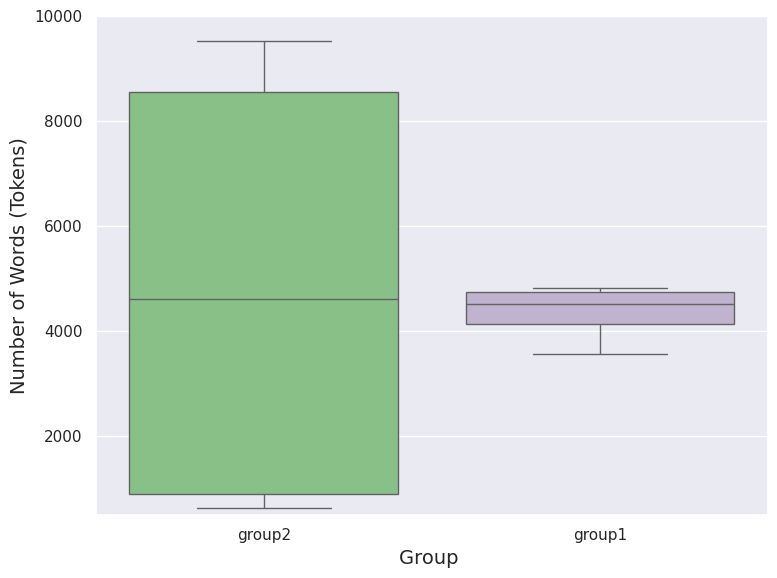

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#🍎🍎🍎🍎🍎 'Group'
# Normalize category labels (critical step)
df1['Group '] = df1['Group '].str.strip().str.lower()

# Check the unique values (optional debug)
print(df1['Group '].value_counts())

# Set theme and size
sns.set_theme(style='white')
sns.set(rc={'figure.figsize':(8,6),"font.size":14,"axes.titlesize":18,"axes.labelsize":14})

# Prepare the data
dd = df1[['Group ', 'N_Splits']].copy()

# Draw the boxplot (1 box per category)
ax = sns.boxplot(x='Group ', y='N_Splits', data=dd, palette="Accent")
ax.set_ylim([500, 10000]) #🍎🍎🍎🍎🍎 adjust second element(e.g.,1000) if necessary!
ax.set(xlabel='Group ', ylabel='Number of Words (Tokens)')

# Save the figure
plt.tight_layout()
plt.savefig('boxplot_Nsplit.png')
plt.show()

# <font color = 'red'> 🐹🐾 **Final Script to prepare input text for further analysis (e.g., Common Core Words, Wordcloud, Lexical Diversity, etc.)**

  - # <font color = 'blue'> 🐹🐾 **Important & Useful!**
  - ### **This script will be based on plain text for 10 volumes above.**

In [ ]:
%cd /content/NLP_2025/Wikipedia1

/content/NLP_2025/Wikipedia1


In [ ]:
file_path= '/content/NLP_2025/Wikipedia1/wiki_group1_group2.csv'
df2 = pd.read_csv(file_path)
df2

,Text,Title,Group
0,JacquesLouis David French ʒaklwi david 30 Augu...,JacquesLouis David,Group2
1,JeanAugusteDominique Ingres JeanAugusteDominiq...,JeanAugusteDominique Ingres,Group2
2,Anton Raphael Mengs 12 March 1728 29 June 177...,Anton Raphael Mengs,Group2
3,"PierreNarcisse, baron Guérin 13 March 1774 6 ...",PierreNarcisse Guérin,Group2
4,TITLE Francisco Goya Francisco José de Goya y ...,Francisco Goya,Group1
5,Eugène Delacroix Ferdinand Victor Eugène Delac...,Eugène Delacroix,Group1
6,"""Caspar David Friedrich Caspar David Friedric...",Caspar David Friedrich,Group1
7,J. M. W. Turner Joseph Mallord William Turner ...,J. M. W. Turner,Group1


In [ ]:
# Added column: String length
length = []

for i in range(0, len(df2['Text'])):
  LEN = len(df2['Text'][i])
  length.append(LEN)

df2['Data size'] = length
df2

,Text,Title,Group,Data size
0,JacquesLouis David French ʒaklwi david 30 Augu...,JacquesLouis David,Group2,50263
1,JeanAugusteDominique Ingres JeanAugusteDominiq...,JeanAugusteDominique Ingres,Group2,57909
2,Anton Raphael Mengs 12 March 1728 29 June 177...,Anton Raphael Mengs,Group2,6142
3,"PierreNarcisse, baron Guérin 13 March 1774 6 ...",PierreNarcisse Guérin,Group2,3870
4,TITLE Francisco Goya Francisco José de Goya y ...,Francisco Goya,Group1,29067
5,Eugène Delacroix Ferdinand Victor Eugène Delac...,Eugène Delacroix,Group1,22317
6,"""Caspar David Friedrich Caspar David Friedric...",Caspar David Friedrich,Group1,29788
7,J. M. W. Turner Joseph Mallord William Turner ...,J. M. W. Turner,Group1,26486


In [ ]:
# Added column:  Splitted words, Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df2['Text'])):
  TSP = df2['Text'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)
  # print(TSP)

df2['Splits'] = tsplit
df2['N_Splits'] = splen
df2

,Text,Title,Group,Data size,Splits,N_Splits
0,JacquesLouis David French ʒaklwi david 30 Augu...,JacquesLouis David,Group2,50263,"[JacquesLouis, David, French, ʒaklwi, david, 3...",8219
1,JeanAugusteDominique Ingres JeanAugusteDominiq...,JeanAugusteDominique Ingres,Group2,57909,"[JeanAugusteDominique, Ingres, JeanAugusteDomi...",9533
2,Anton Raphael Mengs 12 March 1728 29 June 177...,Anton Raphael Mengs,Group2,6142,"[Anton, Raphael, Mengs, 12, March, 1728, 29, J...",995
3,"PierreNarcisse, baron Guérin 13 March 1774 6 ...",PierreNarcisse Guérin,Group2,3870,"[PierreNarcisse,, baron, Guérin, 13, March, 17...",629
4,TITLE Francisco Goya Francisco José de Goya y ...,Francisco Goya,Group1,29067,"[TITLE, Francisco, Goya, Francisco, José, de, ...",4832
5,Eugène Delacroix Ferdinand Victor Eugène Delac...,Eugène Delacroix,Group1,22317,"[Eugène, Delacroix, Ferdinand, Victor, Eugène,...",3562
6,"""Caspar David Friedrich Caspar David Friedric...",Caspar David Friedrich,Group1,29788,"[""Caspar, David, Friedrich, Caspar, David, Fri...",4721
7,J. M. W. Turner Joseph Mallord William Turner ...,J. M. W. Turner,Group1,26486,"[J., M., W., Turner, Joseph, Mallord, William,...",4323


In [ ]:
df2.describe()

,Data size,N_Splits
count,8.000000,8.000000
mean,28230.250000,4601.750000
std,18855.535419,3103.434261
min,3870.000000,629.000000
25%,18273.250000,2920.250000
50%,27776.500000,4522.000000
75%,34906.750000,5678.750000
max,57909.000000,9533.000000


# **Lexical Diversity Indices (10 types)**

**Getting LD indices**

In [ ]:
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

In [ ]:
# Added column: String length
lem = []

for i in range(0, len(df2['Text'])):
  LEM = ld.flemmatize(df2['Text'][i])
  print(LEM)
  lem.append(LEM)

df2['Lemma'] = lem

['jacqueslouis', 'david', 'french', 'ʒaklwi', 'david', '30', 'august', '1748', '29', 'december', '1825', 'be', 'a', 'french', 'painter', 'in', 'the', 'neoclassical', 'style', 'consider', 'to', 'be', 'the', 'preeminent', 'painter', 'of', 'the', 'era', 'in', 'the', '1780s', 'his', 'cerebral', 'brand', 'of', 'history', 'painting', 'mark', 'a', 'change', 'in', 'taste', 'away', 'from', 'rococo', 'frivolity', 'toward', 'classical', 'austerity', 'severity', 'and', 'heighten', 'feeling', 'which', 'harmonize', 'with', 'the', 'moral', 'climate', 'of', 'the', 'final', 'year', 'of', 'the', 'ancien', 'régime', 'david', 'late', 'become', 'a', 'active', 'supporter', 'of', 'the', 'french', 'revolution', 'and', 'friend', 'of', 'maximilien', 'robespierre', '17581794', 'and', 'be', 'effectively', 'a', 'dictator', 'of', 'the', 'art', 'under', 'the', 'french', 'republic', 'imprison', 'after', 'robespierres', 'fall', 'from', 'power', 'he', 'align', 'himself', 'with', 'yet', 'another', 'political', 'regime',

In [ ]:
# ADD LD indices

#1. Create empty lists.
TTR = []
RTTR = []
LogTTR = []
MassTTR = []
MSTTR = []
MATTR = []
HDD = []
MTLD = []
MTLD_wrap = []
MTLD_bid = []

# 2. Getting LD index values for each cell:

for i in range(0, len(df2['Lemma'])):
  flt = df2['Lemma'][i]
  ttr = ld.ttr(flt)
  rttr = ld.root_ttr(flt)
  logttr = ld.log_ttr(flt)
  mass = ld.maas_ttr(flt)
  msttr = ld.msttr(flt)
  mattr = ld.mattr(flt)
  hdd = ld.hdd(flt)
  mtld = ld.mtld(flt)
  mtld_wrap = ld.mtld_ma_wrap(flt)
  mtld_bid = ld.mtld_ma_bid(flt)

  # Add values to each list
  TTR.append(ttr)
  RTTR.append(rttr)
  LogTTR.append(logttr)
  MassTTR.append(mass)
  MSTTR.append(msttr)
  MATTR.append(mattr)
  HDD.append(hdd)
  MTLD.append(mtld)
  MTLD_wrap.append(mtld_wrap)
  MTLD_bid.append(mtld_bid)

# Add columns
df2['TTR'] = TTR
df2['RTTR'] = RTTR
df2['LogTTR'] = LogTTR
df2['MassTTR'] = MassTTR
df2['MSTTR'] = MSTTR
df2['MATTR'] = MATTR
df2['HDD'] = HDD
df2['MTLD'] = MTLD
df2['MTLD_wrap'] = MTLD_wrap
df2['MTLD_bid'] = MTLD_bid

In [ ]:
!pip install textstat
import textstat

In [ ]:
df2['N_Sents'] = df2['Text'].apply(textstat.sentence_count)
df2.to_csv('LD_result_with_Nsents.csv')

In [ ]:
df2.describe()

,Data size,N_Splits,TTR,RTTR,LogTTR,MassTTR,MSTTR,MATTR,HDD,MTLD,MTLD_wrap,MTLD_bid,N_Sents
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,28230.250000,4601.750000,0.353023,20.257776,0.869792,0.036792,0.790798,0.791436,0.839493,82.065628,83.647839,83.747813,212.375000
std,18855.535419,3103.434261,0.099723,3.925614,0.019054,0.001267,0.011947,0.012431,0.010684,7.223403,8.183582,8.032777,133.689339
min,3870.000000,629.000000,0.239101,13.248242,0.843809,0.035360,0.772105,0.774158,0.819324,70.988356,73.758693,72.970896,32.000000
25%,18273.250000,2920.250000,0.304068,19.417794,0.861557,0.036107,0.781789,0.783309,0.833812,78.696301,77.198959,77.547314,124.250000
50%,27776.500000,4522.000000,0.326604,21.904964,0.867017,0.036389,0.791756,0.789492,0.840804,82.320624,81.888198,82.737798,225.500000
75%,34906.750000,5678.750000,0.381234,22.497893,0.876764,0.036983,0.798847,0.799247,0.846293,86.167320,90.291699,90.656348,280.250000
max,57909.000000,9533.000000,0.528662,23.605015,0.901063,0.039258,0.807674,0.810972,0.853574,91.666797,95.771759,95.636403,388.000000


##📈 **Plotting**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

Group 
group2    4
group1    4
Name: count, dtype: int64


/tmp/ipython-input-1347720387.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Group ', y='N_Splits', data=dd, palette="Accent")


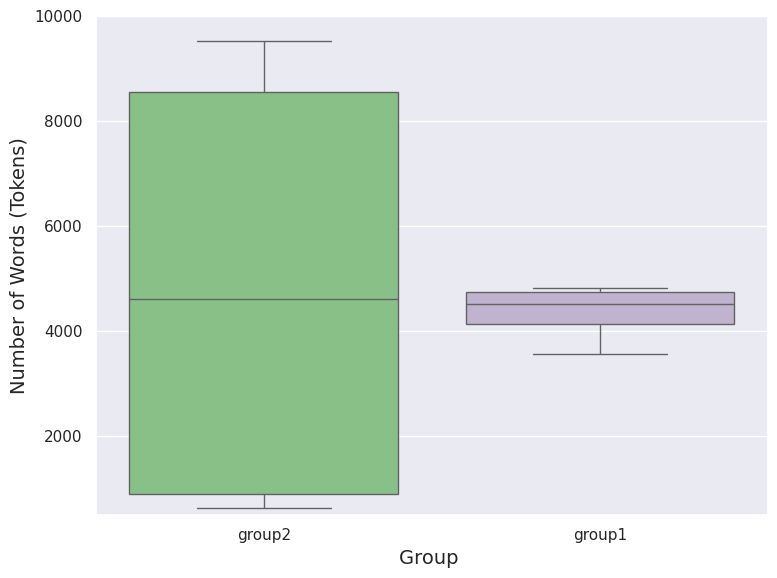

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Normalize category labels (critical step)
df2['Group '] = df2['Group '].str.strip().str.lower()

# Check the unique values (optional debug)
print(df2['Group '].value_counts())

# Set theme and size
sns.set_theme(style='white')
sns.set(rc={'figure.figsize':(8,6),"font.size":14,"axes.titlesize":18,"axes.labelsize":14})

# Prepare the data
dd = df2[['Group ', 'N_Splits']].copy()

# Draw the boxplot (1 box per category)
ax = sns.boxplot(x='Group ', y='N_Splits', data=dd, palette="Accent")
ax.set_ylim([500, 10000])
ax.set(xlabel='Group ', ylabel='Number of Words (Tokens)')

# Save the figure
plt.tight_layout()
plt.savefig('boxplot_Nsplit.png')
plt.show()

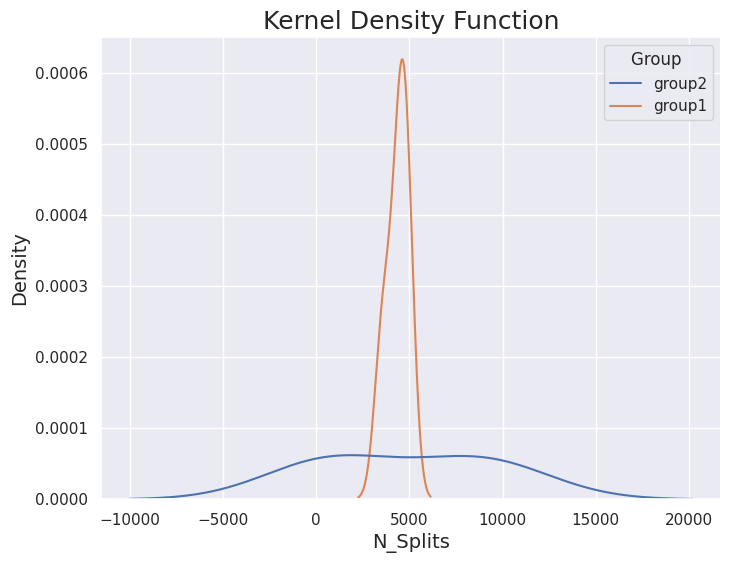

In [ ]:
sns.kdeplot(x='N_Splits', data=df2, hue='Group ', common_norm=False);
plt.title("Kernel Density Function")
plt.savefig('Density_Nsplit.png')

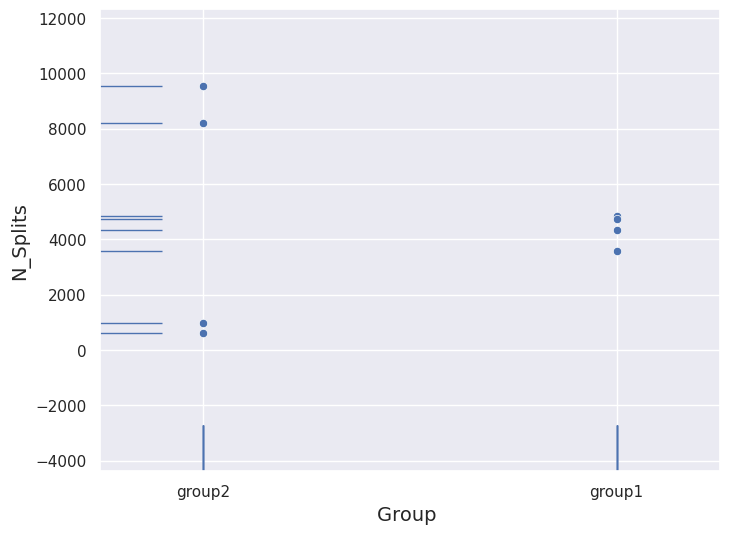

In [ ]:
sns.scatterplot(data=df2, x="Group ", y="N_Splits")
sns.rugplot(data=df2, x="Group ", y="N_Splits", height=.1)
plt.savefig('Rug_Nsplit.png')

### **Lexical Diversity analysis: select TTR, MassTTR, MTLD, HDD**

In [ ]:
df3 = df2
for col in df3.columns:
    print(col)

Text
Title
Group 
Data size
Splits
N_Splits
Lemma
TTR
RTTR
LogTTR
MassTTR
MSTTR
MATTR
HDD
MTLD
MTLD_wrap
MTLD_bid
N_Sents


In [ ]:
df3 = df2[['Group ','N_Splits','N_Sents','TTR','MATTR','HDD','MTLD']]
df3.head(15)

,Group,N_Splits,N_Sents,TTR,MATTR,HDD,MTLD
0,group2,8219,383,0.260372,0.781528,0.834008,73.808328
1,group2,9533,388,0.239101,0.774158,0.819324,70.988356
2,group2,995,50,0.473843,0.797524,0.845484,80.964151
3,group2,629,32,0.528662,0.783903,0.840525,84.787305
4,group1,4832,246,0.318634,0.793587,0.848721,83.677098
5,group1,3562,149,0.350365,0.785397,0.833224,80.325626
6,group1,4721,206,0.323579,0.804418,0.841083,90.307365
7,group1,4323,245,0.329630,0.810972,0.853574,91.666797


In [ ]:
df3.groupby('Group ')['TTR'].describe()

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
group1,4.0,0.330552,0.013953,0.318634,0.322343,0.326604,0.334813,0.350365
group2,4.0,0.375495,0.147184,0.239101,0.255054,0.367108,0.487548,0.528662


In [ ]:
print(df3.groupby('Group ')['TTR'].describe())

        count      mean       std       min       25%       50%       75%  \
Group                                                                       
group1    4.0  0.330552  0.013953  0.318634  0.322343  0.326604  0.334813   
group2    4.0  0.375495  0.147184  0.239101  0.255054  0.367108  0.487548   

             max  
Group             
group1  0.350365  
group2  0.528662  


##**MATTR (Moving average token-to-token ratio)**

In [ ]:
df3.groupby('Group ')['MATTR'].describe()

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
group1,4.0,0.798594,0.011348,0.785397,0.791540,0.799003,0.806057,0.810972
group2,4.0,0.784278,0.009756,0.774158,0.779685,0.782715,0.787308,0.797524


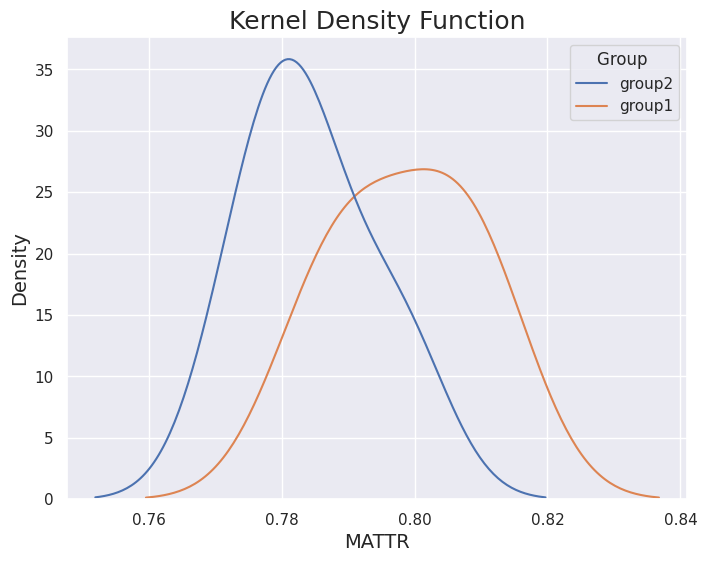

In [ ]:
sns.kdeplot(x='MATTR', data=df3, hue='Group ', common_norm=False);
plt.title("Kernel Density Function")
plt.savefig('Density_MATTR.png')

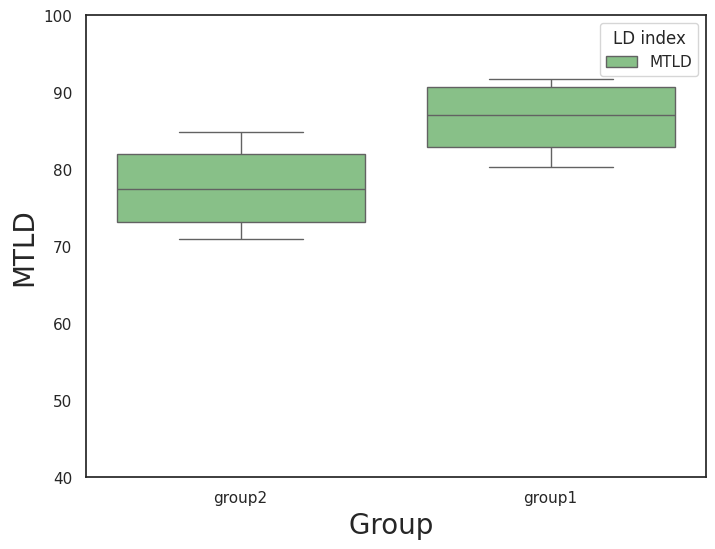

In [ ]:
sns.set(rc={'figure.figsize':(8,6),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
# sns.set_theme(style='white')
dd=pd.melt(df3,id_vars=['Group '],value_vars=['MTLD'],var_name='LD index')
ax = sns.boxplot(x='Group ',y='value',data=dd,hue='LD index',palette="Accent")
ax.set_ylim([40,100])
ax.set(xlabel='Group ', ylabel='MTLD')
plt.savefig('boxplot_MTLD_by_group.png')

#📚 📚 **Readability**

###**Install packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

!pip install textstat
import textstat

In [ ]:
from typing import TextIO
FRE = []
FKG = []
GF = []
ARI = []
CLI = []
LWF = []
DCRS = []
TS = []

for i in range(0, len(df2['Text'])):
  text = df2['Text'][i]
  fre = textstat.flesch_reading_ease(text)
  fkg = textstat.flesch_kincaid_grade(text)
  gf = textstat.gunning_fog(text)
  ari = textstat.automated_readability_index(text)
  cli = textstat.coleman_liau_index(text)
  lwf = textstat.linsear_write_formula(text)
  dcrs = textstat.dale_chall_readability_score(text)
  ts = textstat.text_standard(text)

  FRE.append(fre)
  FKG.append(fkg)
  GF.append(gf)
  ARI.append(ari)
  CLI.append(cli)
  LWF.append(lwf)
  DCRS.append(dcrs)
  TS.append(ts)


df3['FRE'] = FRE #Flesch Reading Ease
df3['FKG'] = FKG
df3['GF'] = GF
df3['ARI'] = ARI
df3['CLI'] = CLI
df3['LWF'] = LWF
df3['DCRS'] = DCRS
df3['TS'] = TS


/tmp/ipython-input-2918853722.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['FRE'] = FRE #Flesch Reading Ease
/tmp/ipython-input-2918853722.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['FKG'] = FKG
/tmp/ipython-input-2918853722.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [ ]:
df3.to_csv('results_wiki_group1_group2.csv')

In [ ]:
df3.head(15)

,Group,N_Splits,N_Sents,TTR,MATTR,HDD,MTLD,FRE,FKG,GF,ARI,CLI,LWF,DCRS,TS
0,group2,8219,383,0.260372,0.781528,0.834008,73.808328,47.319960,11.990289,14.394738,13.336295,11.687991,17.500000,11.167511,10th and 11th grade
1,group2,9533,388,0.239101,0.774158,0.819324,70.988356,45.421674,13.018723,15.582916,14.681714,11.729047,19.000000,11.330928,13th and 14th grade
2,group2,995,50,0.473843,0.797524,0.845484,80.964151,46.358671,11.727001,15.033627,12.655910,11.692044,12.800000,12.015665,11th and 12th grade
3,group2,629,32,0.528662,0.783903,0.840525,84.787305,56.647791,10.233495,13.009236,12.419225,11.423885,15.250000,13.058053,12th and 13th grade
4,group1,4832,246,0.318634,0.793587,0.848721,83.677098,50.530441,11.089015,13.725294,11.925376,11.006749,11.500000,11.822101,11th and 12th grade
5,group1,3562,149,0.350365,0.785397,0.833224,80.325626,43.581262,13.119543,15.918396,15.212835,12.702695,23.666667,11.507057,14th and 15th grade
6,group1,4721,206,0.323579,0.804418,0.841083,90.307365,43.793527,12.837114,15.093834,14.923999,12.975737,17.750000,11.409255,12th and 13th grade
7,group1,4323,245,0.329630,0.810972,0.853574,91.666797,52.422440,10.327892,12.506765,11.422253,11.211157,17.250000,11.773749,11th and 12th grade


In [ ]:
df4 = df3
df4 = df4[['Group ','N_Splits','N_Sents','TTR','MTLD','FRE','FKG','GF']]

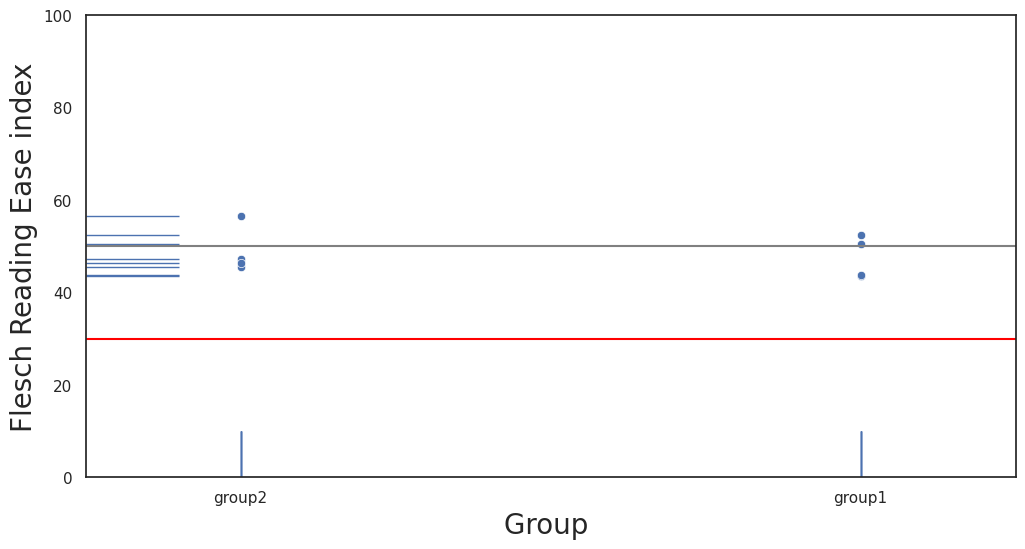

In [ ]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df4, x="Group ", y="FRE")
ax = sns.rugplot(data=df4, x="Group ", y="FRE", height=.1)
ax.set_ylim([0,100])
# ax.set_xlim([2014,2023])
ax.set(xlabel='Group ', ylabel='Flesch Reading Ease index')
ax.axhline(50, color="gray")
ax.axhline(30, color="red")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('Rug_FRE_bycategory.png')

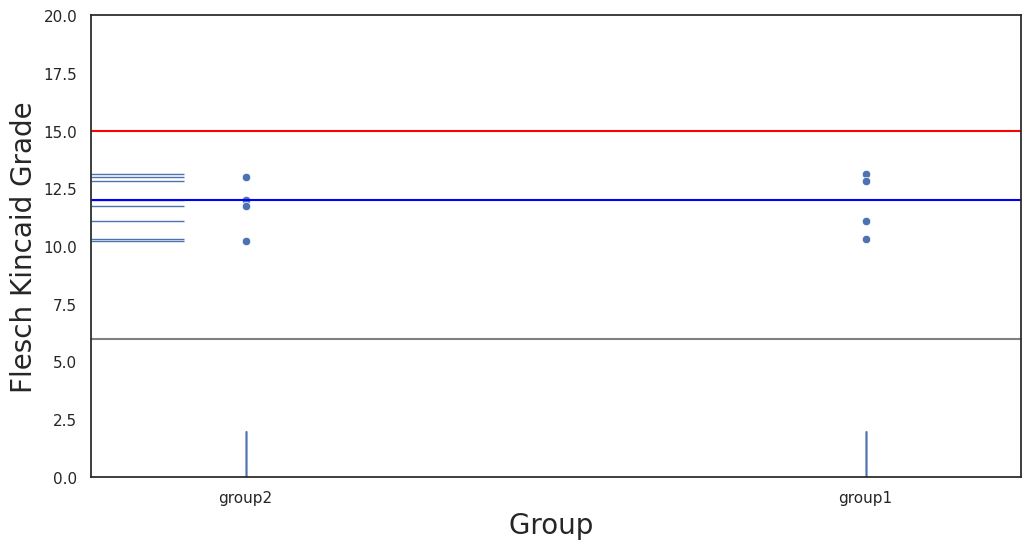

In [ ]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df4, x="Group ", y="FKG")
ax = sns.rugplot(data=df4, x="Group ", y="FKG", height=.1)
ax.set_ylim([0,20])
# ax.set_xlim([2014,2023])
ax.set(xlabel='Group ', ylabel='Flesch Kincaid Grade')
ax.axhline(15, color="red")
ax.axhline(12, color="blue")
ax.axhline(6, color="gray")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('Rug_FKG_byGroup.png')

# <font color = 'red'> **Sentiment Analysis for Group1**

## **Bar Graph & Pie Chart for average across books in Family Narrative**

In [ ]:
import pandas as pd

# ▶️ Change this to your txt file name 🍎🍎🍎🍎🍎
txt_file = "/content/NLP_2025/Wikipedia1/wiki_corpus_delimited_group1_CLEANED_Edit.txt"

# Read the text file
with open(txt_file, "r", encoding="utf-8") as f:
    text = f.read()

# Create a DataFrame
df = pd.DataFrame({"Text": [text]})

# Save as CSV (same name but .csv extension)
csv_file = txt_file.replace(".txt", ".csv")
df.to_csv(csv_file, index=False, encoding="utf-8")

print(f"Created CSV file: {csv_file}")

Created CSV file: /content/NLP_2025/Wikipedia1/wiki_corpus_delimited_group1_CLEANED_Edit.csv


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             Sentence  CompScore  PosFlag  \
0   texttitlegroup \ntitle francisco goya francisc...     0.4019        1   
1   he is considered the most important spanish ar...     0.2716        1   
2   his paintings drawings and engravings reflecte...     0.2023        1   
3   goya is often referred to as the last of the o...     0.0000        0   
4   goya was born in fuendetodos aragon to a middl...     0.0000        0   
5   he studied painting from age 14 under josé luz...     0.0000        0   
6                     he married josefa bayeu in 1773     0.0000        0   
7   goya became a court painter to the spanish cro...     0.0000        0   
8   although goyas letters and writings survive li...     0.0000        0   
9   he had a severe and undiagnosed illness in 179...    -0.7960        0   
10  his later easel and mural paintings prints and...     0.0772        1   
11  he was appointed director of the royal academy...     0.0000        0   

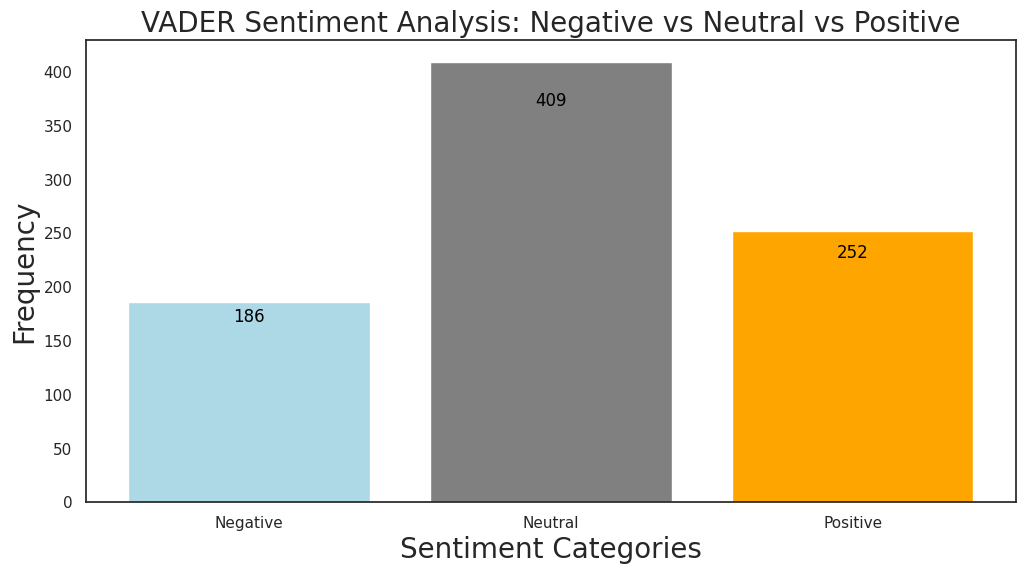

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------
# 1. Import libraries and download NLTK data
# ----------------------------------------------------------------------------------------------------------------------
import pandas as pd
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('vader_lexicon')

from nltk import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# ----------------------------------------------------------------------------------------------------------------------
# 2. Define the missing function: remove_punctuations()
# ----------------------------------------------------------------------------------------------------------------------
def remove_punctuations(text):
    if isinstance(text, str):
        return text.translate(str.maketrans("", "", string.punctuation))
    return text


# ----------------------------------------------------------------------------------------------------------------------
# 3. Load CSV file
# ----------------------------------------------------------------------------------------------------------------------
df = pd.read_csv('/content/NLP_2025/Wikipedia1/wiki_corpus_delimited_group1_CLEANED_Edit.csv')


# ----------------------------------------------------------------------------------------------------------------------
# 4. Sentence tokenization → DataFrame
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment = df['Text'].apply(sent_tokenize).explode().reset_index(drop=True)


# ----------------------------------------------------------------------------------------------------------------------
# 5. Clean punctuation + lowercase
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment = dfsentiment.apply(remove_punctuations).str.lower()


# ----------------------------------------------------------------------------------------------------------------------
# 6. Initialize VADER
# ----------------------------------------------------------------------------------------------------------------------
sid = SentimentIntensityAnalyzer()


# ----------------------------------------------------------------------------------------------------------------------
# 7. Define function to calculate compound score
# ----------------------------------------------------------------------------------------------------------------------
def calculate_compound_score(sentence):
    sentiment_scores = sid.polarity_scores(sentence)
    return sentiment_scores['compound']


# ----------------------------------------------------------------------------------------------------------------------
# 8. Calculate sentiment scores
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment = dfsentiment.to_frame(name="Sentence")
dfsentiment['CompScore'] = dfsentiment['Sentence'].apply(calculate_compound_score)


# ----------------------------------------------------------------------------------------------------------------------
# 9. Add sentiment flags
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment['PosFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment['NegFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment['NeuFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if -0.05 < x < 0.05 else 0)


# ----------------------------------------------------------------------------------------------------------------------
# 10. Display output
# ----------------------------------------------------------------------------------------------------------------------
print(dfsentiment.head(20))


# ----------------------------------------------------------------------------------------------------------------------
# 11. Print frequency counts
# ----------------------------------------------------------------------------------------------------------------------
print('* Negative:', dfsentiment['NegFlag'].sum())
print('* Neutral :', dfsentiment['NeuFlag'].sum())
print('* Positive:', dfsentiment['PosFlag'].sum())
print("="*50)
print("Total sentences:", len(dfsentiment))


# ----------------------------------------------------------------------------------------------------------------------
# 12. Plot the graph
# ----------------------------------------------------------------------------------------------------------------------
Negative = int(dfsentiment['NegFlag'].sum())
Neutral = int(dfsentiment['NeuFlag'].sum())
Positive = int(dfsentiment['PosFlag'].sum())

freqs = [Negative, Neutral, Positive]
labels = ['Negative', 'Neutral', 'Positive']
x = np.arange(len(labels))

colors = ["lightblue", "gray", "orange"]

bars = plt.bar(x, freqs, color=colors)

plt.xticks(x, labels)
plt.xlabel("Sentiment Categories")
plt.ylabel("Frequency")
plt.title("VADER Sentiment Analysis: Negative vs Neutral vs Positive")

# Write numbers inside bars
for bar, freq in zip(bars, freqs):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()*0.9,
             str(freq), ha='center', fontsize=12, color='black')

plt.show()

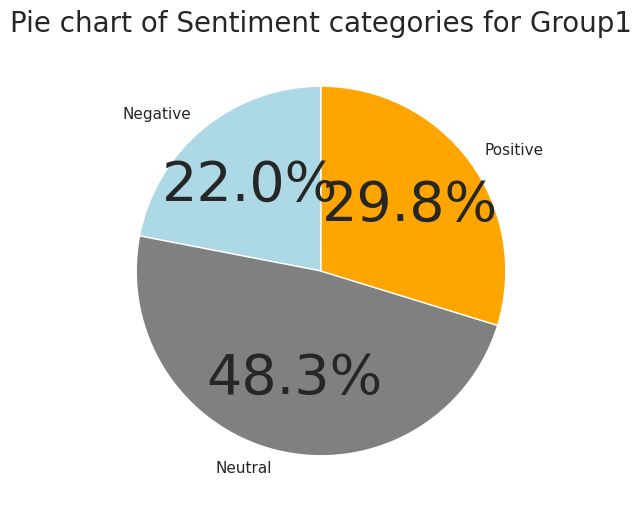

In [ ]:
# 감정분석 카테고리 파이차트 (비율확인용)
import numpy as np
import matplotlib.pyplot as plt

Negative = int(dfsentiment['NegFlag'].sum())
Neutral = int(dfsentiment['NeuFlag'].sum())
Positive = int(dfsentiment['PosFlag'].sum())

# Your three integer frequencies
freqs = [Negative, Neutral, Positive]

# Create labels for the segments
labels = ['Negative', 'Neutral', 'Positive']

# Specify the colors for each segment
colors = ['lightblue', 'gray', 'orange']

# Generate the pie chart with custom colors
plt.pie(freqs, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)

# Set a title for the plot
plt.title('Pie chart of Sentiment categories for Group1')

# Display the plot
plt.show()

#<font color = 'red'> **Sentiment analysis for Group2**

In [ ]:
import pandas as pd

# ▶️ Change this to your txt file name 🍎🍎🍎🍎🍎
txt_file = "/content/NLP_2025/Wikipedia1/wiki_corpus_delimited_group2_CLEANED_Edit.txt"

# Read the text file
with open(txt_file, "r", encoding="utf-8") as f:
    text = f.read()

# Create a DataFrame
df = pd.DataFrame({"Text": [text]})

# Save as CSV (same name but .csv extension)
csv_file = txt_file.replace(".txt", ".csv")
df.to_csv(csv_file, index=False, encoding="utf-8")

print(f"Created CSV file: {csv_file}")

Created CSV file: /content/NLP_2025/Wikipedia1/wiki_corpus_delimited_group2_CLEANED_Edit.csv


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             Sentence  CompScore  PosFlag  \
0   texttitlegroup \njacqueslouis david french ʒak...     0.0000        0   
1   in the 1780s his cerebral brand of history pai...     0.4767        1   
2   david later became an active supporter of the ...     0.8720        1   
3   imprisoned after robespierres fall from power ...    -0.4588        0   
4   at this time he developed his empire style not...     0.2263        1   
5   after napoleons fall from imperial power and t...    -0.2732        0   
6   david had many pupils making him the strongest...     0.4404        1   
7   early life   jacqueslouis david was born into ...     0.4767        1   
8   when he was about nine his father was killed i...    -0.6705        0   
9   they saw to it that he received an excellent e...    -0.6321        0   
10  he covered his notebooks with drawings and he ...    -0.2960        0   
11  soon he desired to be a painter but his uncles...     0.1406        1   

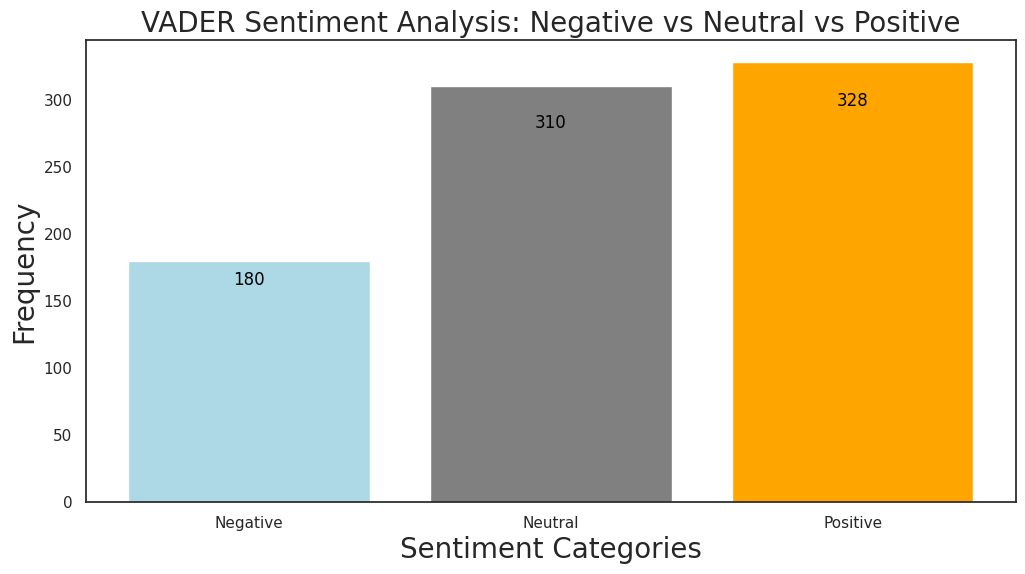

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------
# 1. Import libraries and download NLTK data
# ----------------------------------------------------------------------------------------------------------------------
import pandas as pd
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('vader_lexicon')

from nltk import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# ----------------------------------------------------------------------------------------------------------------------
# 2. Define the missing function: remove_punctuations()
# ----------------------------------------------------------------------------------------------------------------------
def remove_punctuations(text):
    if isinstance(text, str):
        return text.translate(str.maketrans("", "", string.punctuation))
    return text


# ----------------------------------------------------------------------------------------------------------------------
# 3. Load CSV file
# ----------------------------------------------------------------------------------------------------------------------
df = pd.read_csv('/content/NLP_2025/Wikipedia1/wiki_corpus_delimited_group2_CLEANED_Edit.csv')


# ----------------------------------------------------------------------------------------------------------------------
# 4. Sentence tokenization → DataFrame
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment = df['Text'].apply(sent_tokenize).explode().reset_index(drop=True)


# ----------------------------------------------------------------------------------------------------------------------
# 5. Clean punctuation + lowercase
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment = dfsentiment.apply(remove_punctuations).str.lower()


# ----------------------------------------------------------------------------------------------------------------------
# 6. Initialize VADER
# ----------------------------------------------------------------------------------------------------------------------
sid = SentimentIntensityAnalyzer()


# ----------------------------------------------------------------------------------------------------------------------
# 7. Define function to calculate compound score
# ----------------------------------------------------------------------------------------------------------------------
def calculate_compound_score(sentence):
    sentiment_scores = sid.polarity_scores(sentence)
    return sentiment_scores['compound']


# ----------------------------------------------------------------------------------------------------------------------
# 8. Calculate sentiment scores
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment = dfsentiment.to_frame(name="Sentence")
dfsentiment['CompScore'] = dfsentiment['Sentence'].apply(calculate_compound_score)


# ----------------------------------------------------------------------------------------------------------------------
# 9. Add sentiment flags
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment['PosFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment['NegFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment['NeuFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if -0.05 < x < 0.05 else 0)


# ----------------------------------------------------------------------------------------------------------------------
# 10. Display output
# ----------------------------------------------------------------------------------------------------------------------
print(dfsentiment.head(20))


# ----------------------------------------------------------------------------------------------------------------------
# 11. Print frequency counts
# ----------------------------------------------------------------------------------------------------------------------
print('* Negative:', dfsentiment['NegFlag'].sum())
print('* Neutral :', dfsentiment['NeuFlag'].sum())
print('* Positive:', dfsentiment['PosFlag'].sum())
print("="*50)
print("Total sentences:", len(dfsentiment))


# ----------------------------------------------------------------------------------------------------------------------
# 12. Plot the graph
# ----------------------------------------------------------------------------------------------------------------------
Negative = int(dfsentiment['NegFlag'].sum())
Neutral = int(dfsentiment['NeuFlag'].sum())
Positive = int(dfsentiment['PosFlag'].sum())

freqs = [Negative, Neutral, Positive]
labels = ['Negative', 'Neutral', 'Positive']
x = np.arange(len(labels))

colors = ["lightblue", "gray", "orange"]

bars = plt.bar(x, freqs, color=colors)

plt.xticks(x, labels)
plt.xlabel("Sentiment Categories")
plt.ylabel("Frequency")
plt.title("VADER Sentiment Analysis: Negative vs Neutral vs Positive")

# Write numbers inside bars
for bar, freq in zip(bars, freqs):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()*0.9,
             str(freq), ha='center', fontsize=12, color='black')

plt.show()

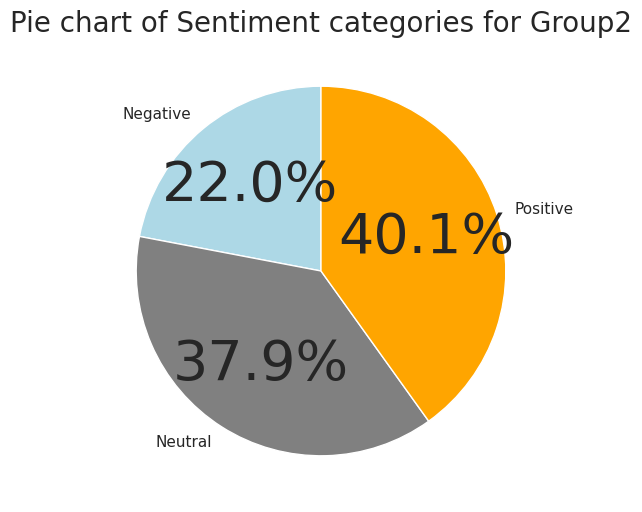

In [ ]:
# 감정분석 카테고리 파이차트 (비율확인용)
import numpy as np
import matplotlib.pyplot as plt

Negative = int(dfsentiment['NegFlag'].sum())
Neutral = int(dfsentiment['NeuFlag'].sum())
Positive = int(dfsentiment['PosFlag'].sum())

# Your three integer frequencies
freqs = [Negative, Neutral, Positive]

# Create labels for the segments
labels = ['Negative', 'Neutral', 'Positive']

# Specify the colors for each segment
colors = ['lightblue', 'gray', 'orange']

# Generate the pie chart with custom colors
plt.pie(freqs, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)

# Set a title for the plot
plt.title('Pie chart of Sentiment categories for Group2')

# Display the plot
plt.show()

semantic similarity for group1

In [ ]:
!pip install --upgrade --force-reinstall smart_open

  Using cached smart_open-7.5.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-2.0.1-cp312-cp312-manylinux1_x86_64.manylinux_2_28_x86_64.manylinux_2_5_x86_64.whl.metadata (9.0 kB)
Using cached smart_open-7.5.0-py3-none-any.whl (63 kB)
Using cached wrapt-2.0.1-cp312-cp312-manylinux1_x86_64.manylinux_2_28_x86_64.manylinux_2_5_x86_64.whl (121 kB)
  Attempting uninstall: wrapt
    Found existing installation: wrapt 2.0.1
    Uninstalling wrapt-2.0.1:
      Successfully uninstalled wrapt-2.0.1
  Attempting uninstall: smart_open
    Found existing installation: smart_open 7.5.0
    Uninstalling smart_open-7.5.0:
      Successfully uninstalled smart_open-7.5.0


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


✅ Generating Adaptive Semantic Network...
✅ Network graph saved to: /content/NLP_2025/Wikipedia1/Adaptive Semantic Similarity Network (Word-Level for Group1)


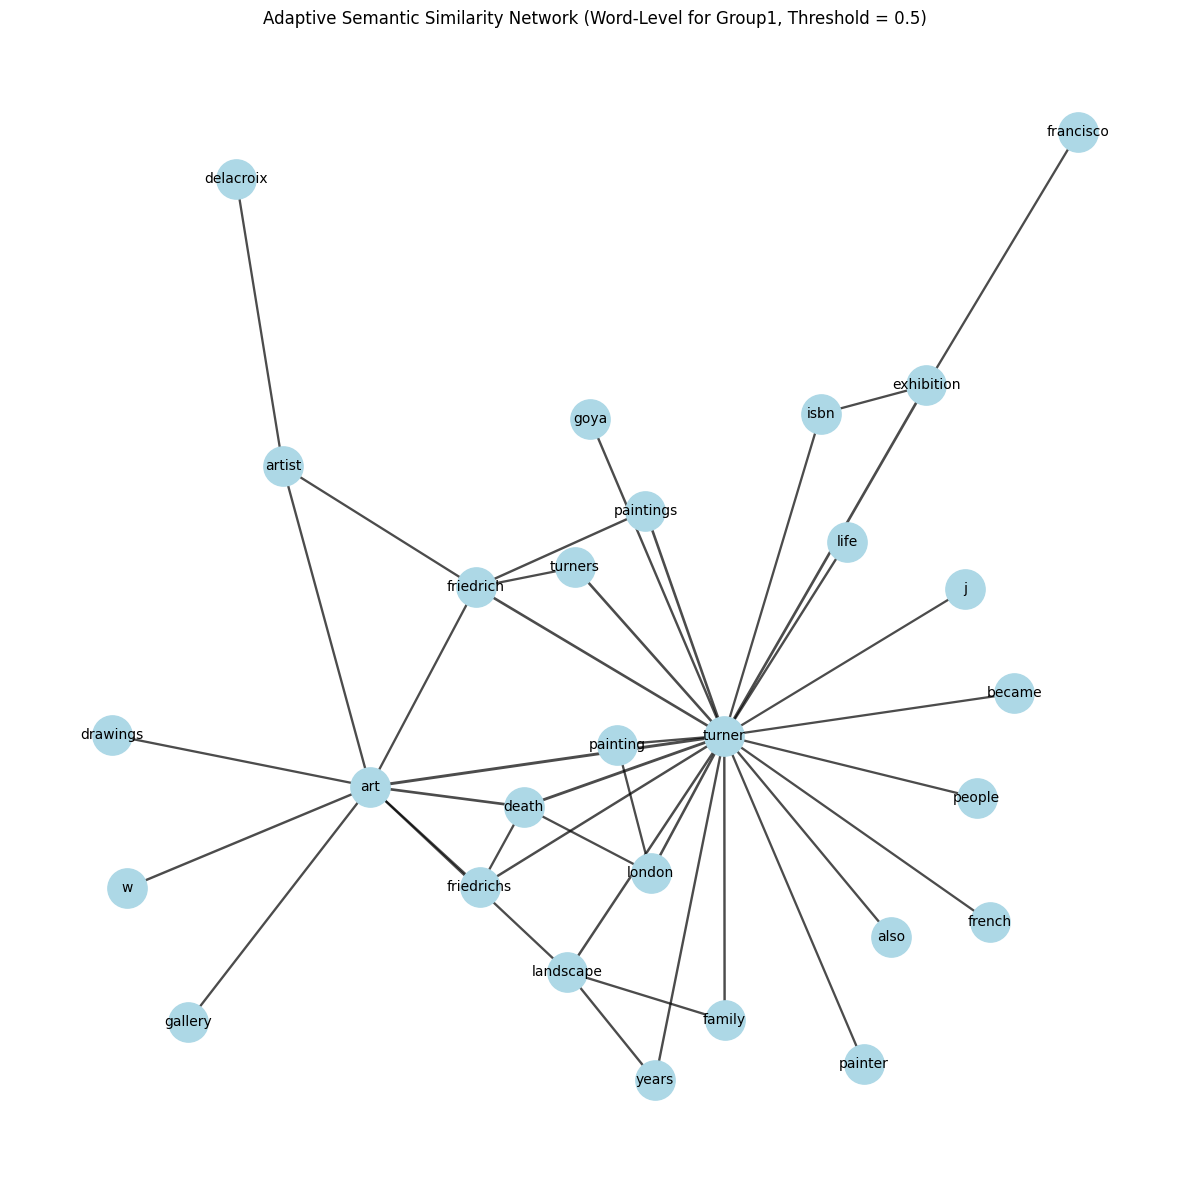

✅ Generating PCA Plot...
✅ PCA plot saved to: /content/NLP_2025/Wikipedia1/PCA of Word Embeddings for Group1.png


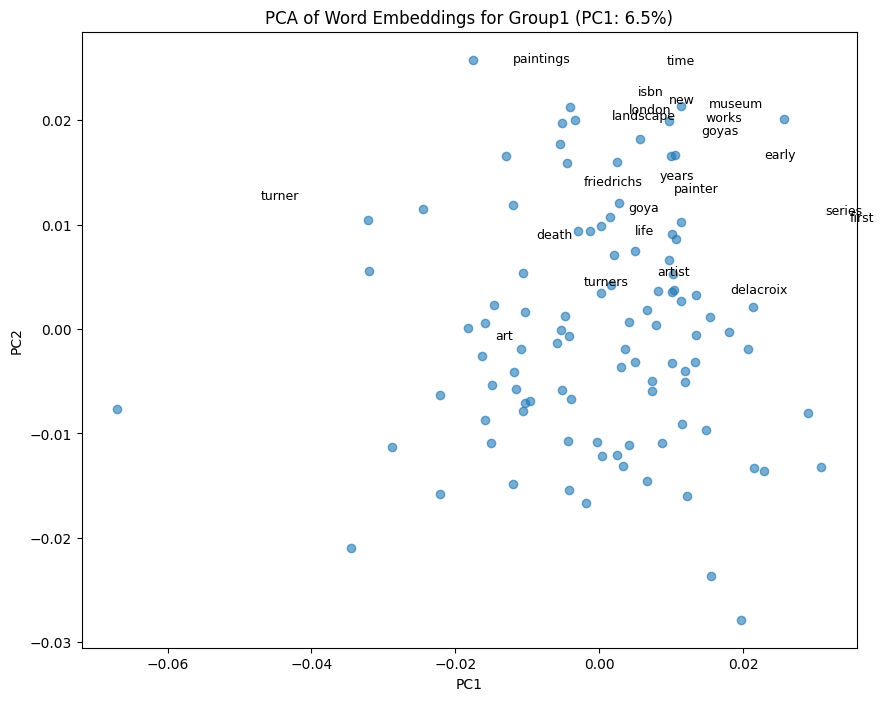

✅ Generating t-SNE Plot...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


✅ t-SNE plot saved to: /content/NLP_2025/Wikipedia1/t-SNE of Word Embeddings for Group1.png


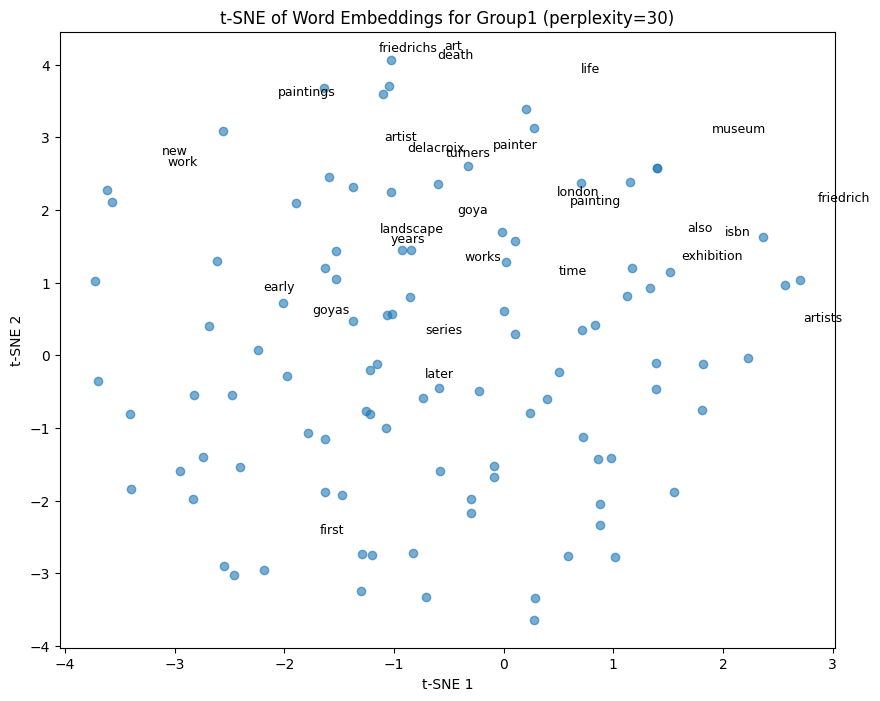

In [ ]:
# !pip install gensim nltk scikit-learn matplotlib pandas networkx
!pip install gensim
!pip install nltk

# Standard POS tagger
nltk.download("averaged_perceptron_tagger")

# Newer English-only POS tagger required in some NLTK versions
nltk.download("averaged_perceptron_tagger_eng")

import os
import pandas as pd
import nltk
import string
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# --- Utility ---
def get_wordnet_pos(tag):
    if tag.startswith('J'): return wordnet.ADJ
    elif tag.startswith('V'): return wordnet.VERB
    elif tag.startswith('N'): return wordnet.NOUN
    elif tag.startswith('R'): return wordnet.ADV
    else: return None

def load_texts(file_path, text_column='text'):
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip().str.lower()
    col = text_column.lower()
    texts = df[col].dropna().astype(str).tolist()
    return texts

def preprocess(texts):
    stop_words = set(stopwords.words('english'))
    sentences = []
    for text in texts:
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = nltk.word_tokenize(text.lower())
        pos_tags = pos_tag(tokens)
        filtered = [w for w, p in pos_tags if w.isalpha() and w not in stop_words and get_wordnet_pos(p)]
        if filtered:
            sentences.append(filtered)
    return sentences

# --- Train Word2Vec ---
def train_w2v(sentences, vector_size=100):
    return Word2Vec(sentences, vector_size=vector_size, window=5, min_count=2, workers=4, seed=42)

# --- Adaptive semantic network ---
def adaptive_network(model, save_dir, max_edges=60):
    words = list(model.wv.index_to_key)
    pairs = []
    for w in words[:200]:
        for sw, sim in model.wv.most_similar(w, topn=5):
            pairs.append((w, sw, sim))
    pairs = sorted(pairs, key=lambda x: x[2], reverse=True)
    pairs = pairs[:max_edges]

    G = nx.Graph()
    for a, b, s in pairs:
        G.add_edge(a, b, weight=s)

    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=0.5, iterations=80, seed=42)
    weights = [d['weight'] for (u, v, d) in G.edges(data=True)]
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800)
    nx.draw_networkx_edges(G, pos, width=[3*w for w in weights], alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.title("Adaptive Semantic Similarity Network (Word-Level for Group1, Threshold = 0.5)")
    plt.axis('off')
    plt.tight_layout()

    # Save the figure
    save_path = os.path.join(save_dir, "Adaptive Semantic Similarity Network (Word-Level for Group1)")
    plt.savefig(save_path, dpi=300)
    print(f"✅ Network graph saved to: {save_path}")
    plt.show()

# --- PCA Visualization ---
def plot_pca(model, save_dir, top_n=100, label_n=30):
    words = list(model.wv.index_to_key)[:top_n]
    X = np.array([model.wv[w] for w in words])
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(10,8))
    plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
    for i, w in enumerate(words[:label_n]):
        plt.annotate(w, (X_pca[i,0]+0.02, X_pca[i,1]+0.02), fontsize=9)
    plt.title(f"PCA of Word Embeddings for Group1 (PC1: {pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.xlabel("PC1"); plt.ylabel("PC2")

    # Save the figure
    save_path = os.path.join(save_dir, "PCA of Word Embeddings for Group1.png")
    plt.savefig(save_path, dpi=300)
    print(f"✅ PCA plot saved to: {save_path}")
    plt.show()

# --- t-SNE Visualization ---
def plot_tsne(model, save_dir, top_n=100, label_n=30):
    words = list(model.wv.index_to_key)[:top_n]
    X = np.array([model.wv[w] for w in words])
    perp = min(30, (len(words) - 1) // 3)
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42, n_iter=1000)
    X_tsne = tsne.fit_transform(X)
    plt.figure(figsize=(10,8))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.6)
    for i, w in enumerate(words[:label_n]):
        plt.annotate(w, (X_tsne[i,0]+0.5, X_tsne[i,1]+0.5), fontsize=9)
    plt.title(f"t-SNE of Word Embeddings for Group1 (perplexity={perp})")
    plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")

    # Save the figure
    save_path = os.path.join(save_dir, "t-SNE of Word Embeddings for Group1.png")
    plt.savefig(save_path, dpi=300)
    print(f"✅ t-SNE plot saved to: {save_path}")
    plt.show()

# --- Main ---
def main():
    file_path = "/content/NLP_2025/Wikipedia1/wiki_corpus_delimited_group1_CLEANED_Edit.csv"
    text_column = "Text"
    save_dir = os.path.dirname(file_path)

    texts = load_texts(file_path, text_column)
    sentences = preprocess(texts)
    model = train_w2v(sentences)

    print("✅ Generating Adaptive Semantic Network...")
    adaptive_network(model, save_dir, max_edges=60)

    print("✅ Generating PCA Plot...")
    plot_pca(model, save_dir, top_n=100, label_n=30)

    print("✅ Generating t-SNE Plot...")
    plot_tsne(model, save_dir, top_n=100, label_n=30)

if __name__ == "__main__":
    main()

semantic similarity for group2

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Generating Adaptive Semantic Network...
✅ Network graph saved to: /content/NLP_2025/Wikipedia1/Adaptive Semantic Similarity Network (Word-Level for Group2)


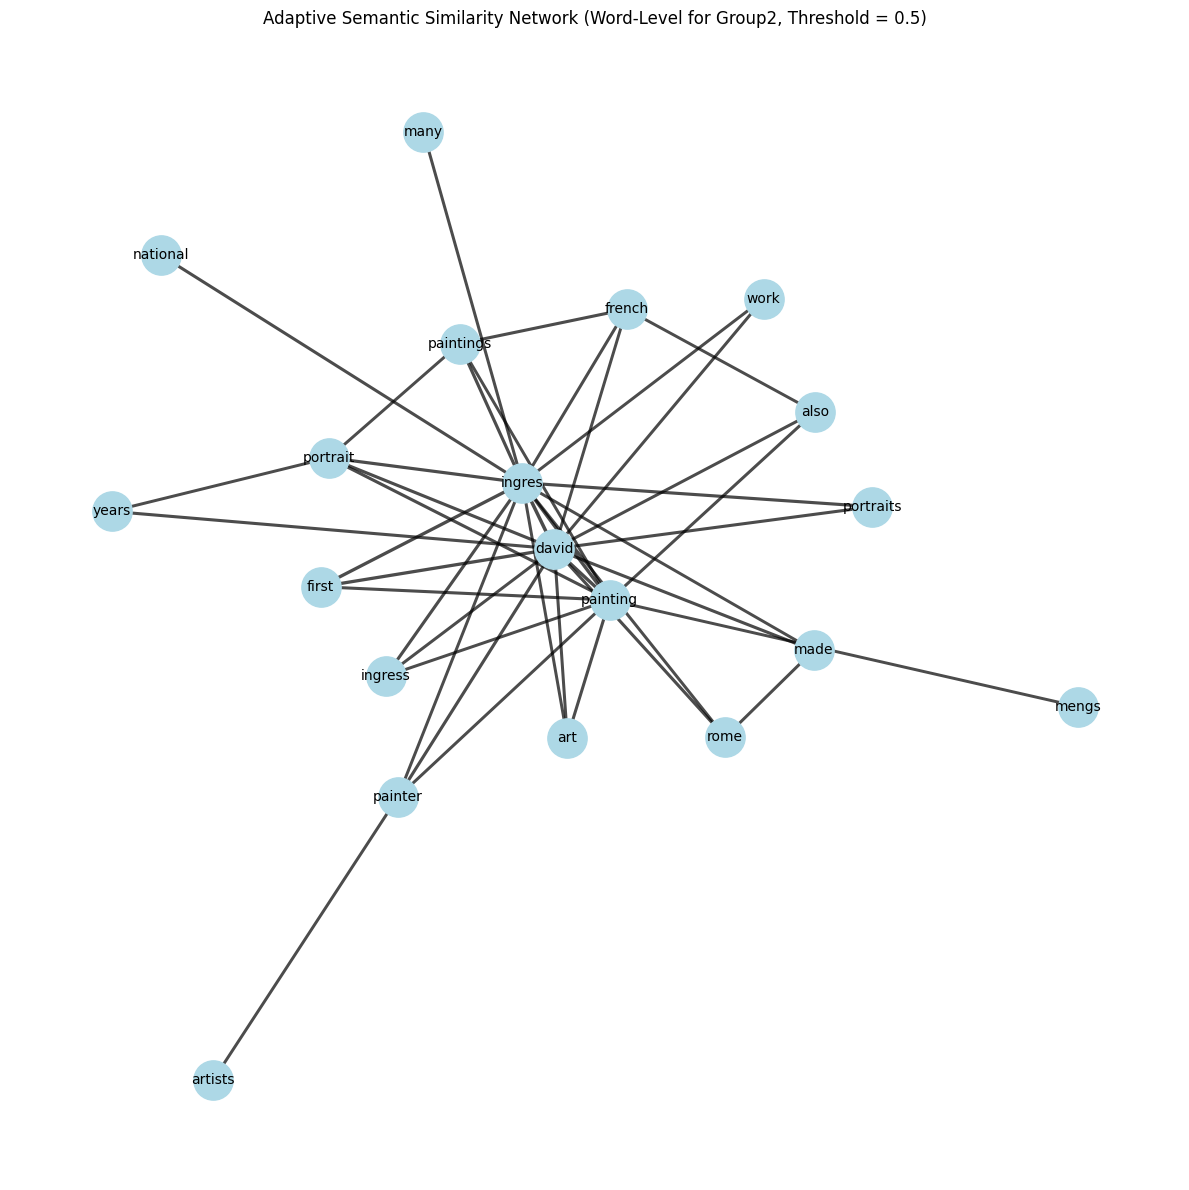

✅ Generating PCA Plot...
✅ PCA plot saved to: /content/NLP_2025/Wikipedia1/PCA of Word Embeddings for Group2.png


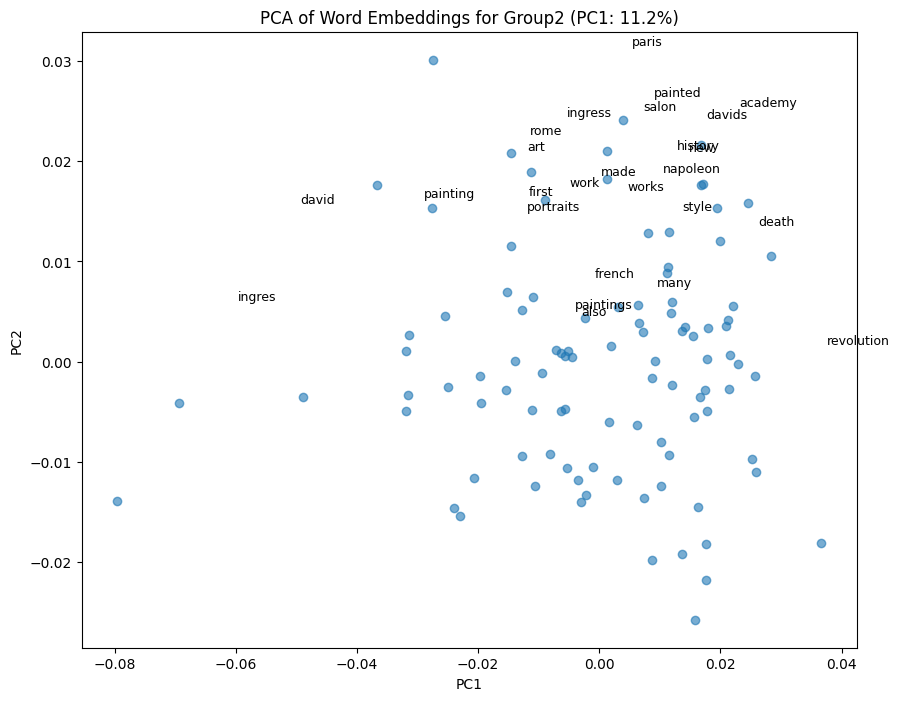

✅ Generating t-SNE Plot...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


✅ t-SNE plot saved to: /content/NLP_2025/Wikipedia1/t-SNE of Word Embeddings for Group2.png


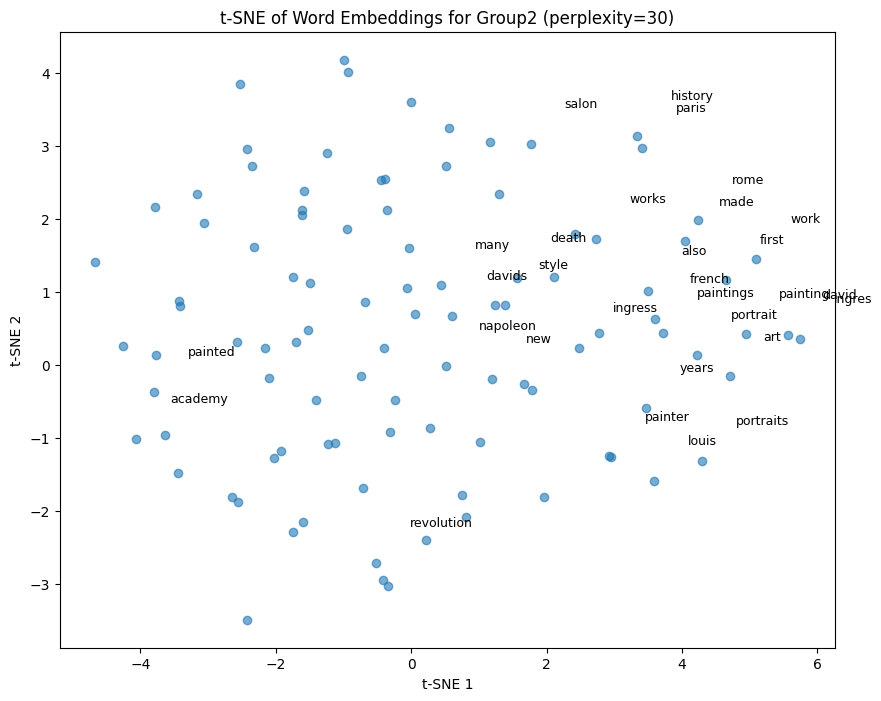

In [ ]:
# !pip install gensim nltk scikit-learn matplotlib pandas networkx
!pip install gensim
!pip install nltk

# Standard POS tagger
nltk.download("averaged_perceptron_tagger")

# Newer English-only POS tagger required in some NLTK versions
nltk.download("averaged_perceptron_tagger_eng")

import os
import pandas as pd
import nltk
import string
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# --- Utility ---
def get_wordnet_pos(tag):
    if tag.startswith('J'): return wordnet.ADJ
    elif tag.startswith('V'): return wordnet.VERB
    elif tag.startswith('N'): return wordnet.NOUN
    elif tag.startswith('R'): return wordnet.ADV
    else: return None

def load_texts(file_path, text_column='text'):
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip().str.lower()
    col = text_column.lower()
    texts = df[col].dropna().astype(str).tolist()
    return texts

def preprocess(texts):
    stop_words = set(stopwords.words('english'))
    sentences = []
    for text in texts:
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = nltk.word_tokenize(text.lower())
        pos_tags = pos_tag(tokens)
        filtered = [w for w, p in pos_tags if w.isalpha() and w not in stop_words and get_wordnet_pos(p)]
        if filtered:
            sentences.append(filtered)
    return sentences

# --- Train Word2Vec ---
def train_w2v(sentences, vector_size=100):
    return Word2Vec(sentences, vector_size=vector_size, window=5, min_count=2, workers=4, seed=42)

# --- Adaptive semantic network ---
def adaptive_network(model, save_dir, max_edges=60):
    words = list(model.wv.index_to_key)
    pairs = []
    for w in words[:200]:
        for sw, sim in model.wv.most_similar(w, topn=5):
            pairs.append((w, sw, sim))
    pairs = sorted(pairs, key=lambda x: x[2], reverse=True)
    pairs = pairs[:max_edges]

    G = nx.Graph()
    for a, b, s in pairs:
        G.add_edge(a, b, weight=s)

    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=0.5, iterations=80, seed=42)
    weights = [d['weight'] for (u, v, d) in G.edges(data=True)]
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800)
    nx.draw_networkx_edges(G, pos, width=[3*w for w in weights], alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.title("Adaptive Semantic Similarity Network (Word-Level for Group2, Threshold = 0.5)")
    plt.axis('off')
    plt.tight_layout()

    # Save the figure
    save_path = os.path.join(save_dir, "Adaptive Semantic Similarity Network (Word-Level for Group2)")
    plt.savefig(save_path, dpi=300)
    print(f"✅ Network graph saved to: {save_path}")
    plt.show()

# --- PCA Visualization ---
def plot_pca(model, save_dir, top_n=100, label_n=30):
    words = list(model.wv.index_to_key)[:top_n]
    X = np.array([model.wv[w] for w in words])
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(10,8))
    plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
    for i, w in enumerate(words[:label_n]):
        plt.annotate(w, (X_pca[i,0]+0.02, X_pca[i,1]+0.02), fontsize=9)
    plt.title(f"PCA of Word Embeddings for Group2 (PC1: {pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.xlabel("PC1"); plt.ylabel("PC2")

    # Save the figure
    save_path = os.path.join(save_dir, "PCA of Word Embeddings for Group2.png")
    plt.savefig(save_path, dpi=300)
    print(f"✅ PCA plot saved to: {save_path}")
    plt.show()

# --- t-SNE Visualization ---
def plot_tsne(model, save_dir, top_n=100, label_n=30):
    words = list(model.wv.index_to_key)[:top_n]
    X = np.array([model.wv[w] for w in words])
    perp = min(30, (len(words) - 1) // 3)
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42, n_iter=1000)
    X_tsne = tsne.fit_transform(X)
    plt.figure(figsize=(10,8))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.6)
    for i, w in enumerate(words[:label_n]):
        plt.annotate(w, (X_tsne[i,0]+0.5, X_tsne[i,1]+0.5), fontsize=9)
    plt.title(f"t-SNE of Word Embeddings for Group2 (perplexity={perp})")
    plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")

    # Save the figure
    save_path = os.path.join(save_dir, "t-SNE of Word Embeddings for Group2.png")
    plt.savefig(save_path, dpi=300)
    print(f"✅ t-SNE plot saved to: {save_path}")
    plt.show()

# --- Main ---
def main():
    file_path = "/content/NLP_2025/Wikipedia1/wiki_corpus_delimited_group2_CLEANED_Edit.csv"
    text_column = "Text"
    save_dir = os.path.dirname(file_path)

    texts = load_texts(file_path, text_column)
    sentences = preprocess(texts)
    model = train_w2v(sentences)

    print("✅ Generating Adaptive Semantic Network...")
    adaptive_network(model, save_dir, max_edges=60)

    print("✅ Generating PCA Plot...")
    plot_pca(model, save_dir, top_n=100, label_n=30)

    print("✅ Generating t-SNE Plot...")
    plot_tsne(model, save_dir, top_n=100, label_n=30)

if __name__ == "__main__":
    main()

###🐹🐾 **2️⃣ Clone a repository on your github (Beware that the following code uses your instructor's github repository**

In [ ]:
!git clone 'https://github.com/ms624atyale/NLP_PictureBook_2025'

Cloning into 'NLP_PictureBook_2025'...
remote: Enumerating objects: 438, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 438 (delta 124), reused 67 (delta 67), pack-reused 281 (from 1)
Receiving objects: 100% (438/438), 9.20 MiB | 11.97 MiB/s, done.
Resolving deltas: 100% (232/232), done.


In [ ]:
!git clone 'https://github.com/20250166/Web_Scraping_Group1'

Cloning into 'Web_Scraping_Group1'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
